In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open('iris_ndarray.pickle', 'rb') as f:
    iris_np = pickle.load(f)
#print(iris_np)
# sepal ratio : sepal length[0] / sepal width[1]
sepal_length = iris_np[:, 0]
sepal_width = iris_np[:, 1]
sepal_ratio = sepal_length / sepal_width
#print(sepal_ratio)

# petal ratio : petal length[3] / petal width[4]
petal_length = iris_np[:, 2]
petal_width = iris_np[:, 3]
petal_ratio = petal_length / petal_width
#print(petal_ratio)

print(sepal_ratio.shape)
sepal_ratio_2d = np.expand_dims(sepal_ratio, 1)
print(sepal_ratio_2d.shape)

print(petal_ratio.shape)
petal_ratio_2d = petal_ratio[:, np.newaxis]
print(petal_ratio_2d.shape)

concat_result = np.concatenate((sepal_ratio_2d, petal_ratio_2d), axis = 1)
print(concat_result.shape)
print(concat_result[:10])

(150,)
(150, 1)
(150,)
(150, 1)
(150, 2)
[[ 1.45714286  7.        ]
 [ 1.63333333  7.        ]
 [ 1.46875     6.5       ]
 [ 1.48387097  7.5       ]
 [ 1.38888889  7.        ]
 [ 1.38461538  4.25      ]
 [ 1.35294118  4.66666667]
 [ 1.47058824  7.5       ]
 [ 1.51724138  7.        ]
 [ 1.58064516 15.        ]]


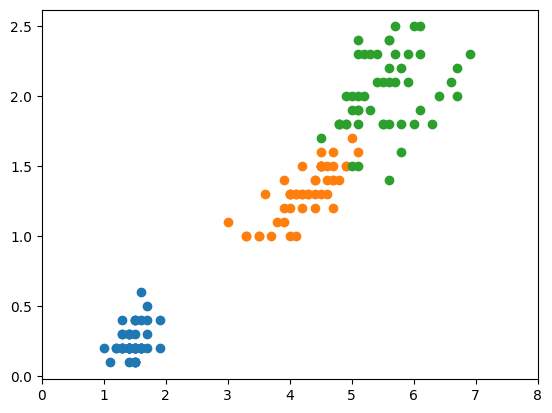

In [2]:
filter_class0 = iris_np[:, -1] == 0.0
iris_np_class0 = iris_np[filter_class0]

filter_class1 = iris_np[:, -1] == 1.0
iris_np_class1 = iris_np[filter_class1]

filter_class2 = iris_np[:, -1] == 2.0 
iris_np_class2 = iris_np[filter_class2]

_, axe = plt.subplots()
axe.set_xlim(0, 3.0)
axe.set_xlim(0, 8)
# class 0만 풀롯, bool list를 이용 필터링
axe.scatter(iris_np_class0[:, 2], iris_np_class0[:, 3])
axe.scatter(iris_np_class1[:, 2], iris_np_class1[:, 3])
axe.scatter(iris_np_class2[:, 2], iris_np_class2[:, 3])

In [6]:
def kNN_predict(iris_np_data, petal_length, petal_width):
    sub_data = iris_np_data[:, 2:4]
    target_np = np.array([petal_length, petal_width])
    print(sub_data.shape)
    print(target_np.shape)
    #print(target_np - sub_data)        # [5.0 1.5] - [1.4 2.0]
    #print((target_np - sub_data) ** 2)
    
    #print(np.sum(((target_np - sub_data) ** 2), axis = 1))
    dist = np.sqrt(np.sum(((target_np - sub_data) ** 2), axis = 1))
    print(dist[:3], len(dist))
    class_np = iris_np_data[:, -1]
    print(class_np[:3], len(class_np))
    
    dist_1 = np.expand_dims(dist, 1)
    class_np_1 = np.expand_dims(class_np, 1)
    print(dist_1.shape)
    print(class_np_1.shape)
    r = np.concatenate((dist_1, class_np_1), axis = 1)
    print(r.shape)
    r = sorted(r, key = lambda x : x[1], reverse = True)
    print(r[:10])

kNN_predict(iris_np, 5.0, 1.5)  # 거리가 가장 가까운 5개 샘플기록 반환

(150, 2)
(2,)
[3.82753184 3.82753184 3.92173431] 150
[0. 0. 0.] 150
(150, 1)
(150, 1)
(150, 2)
[array([1.41421356, 2.        ]), array([0.41231056, 2.        ]), array([1.08166538, 2.        ]), array([0.67082039, 2.        ]), array([1.06301458, 2.        ]), array([1.70880075, 2.        ]), array([0.53851648, 2.        ]), array([1.33416641, 2.        ]), array([0.85440037, 2.        ]), array([1.48660687, 2.        ])]
